In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import sin, cos

In [9]:
def calc_inverse(yaw, pitch):
    RotMat_x = np.array([[1.0,        0.0,        0.0],
                         [0.0,  cos(yaw), -sin(yaw)],
                         [0.0,  sin(yaw),  cos(yaw)]]) 

    RotMat_y = np.array([[cos(pitch),  0.0, sin(pitch)],
                         [0.0,         1.0,        0.0],
                         [-sin(pitch), 0.0, cos(pitch)]])
    RotMat = RotMat_x.dot(RotMat_y)
    
    e1_ee = np.array([-0.162, 0.0935, 0.0375])
    e2_ee = np.array([-0.162, -0.0935, 0.0375])
    b1 = np.array([-0.1399, 0.0625, -0.3547])
    b2 = np.array([-0.1399, -0.0625, -0.3547])
    
    e1 = RotMat.dot(e1_ee)
    e2 = RotMat.dot(e2_ee)
    
    b1e1 = e1 - b1
    b2e2 = e2 - b2
    
    mid_pt = 0.39404346206985846
    offset = 0.06
    d1 = np.linalg.norm(e1-b1)-mid_pt + offset
    d2 = np.linalg.norm(e2-b2)-mid_pt + offset
    return (d1,d2)

In [145]:
calc_inverse(0.0,0.0)

YAW = np.arange(-np.pi/9, np.pi/9, 0.01)
PITCH = np.arange(-np.pi/9, np.pi/9, 0.01)
Z1 = np.empty([X.shape[0],Y.shape[0]])
Z2 = np.empty([X.shape[0],Y.shape[0]])
for i,yaw in enumerate(YAW):
    for j,pitch in enumerate(PITCH):
        a1,a2 = calc_inverse(yaw,pitch)
        if(a1<0.0 or a1>0.12):
            a1=np.nan
            a2=np.nan
        if(a2<0.0 or a2>0.12):
            a1=np.nan
            a2=np.nan
        Z1[i,j],Z2[i,j] = a1,a2

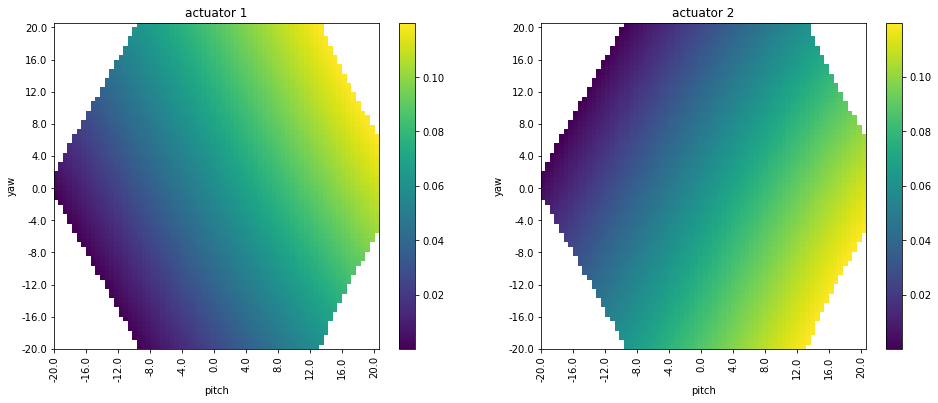

In [148]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
z1 = ax[0].pcolormesh(Z1)
fig.colorbar(z1, ax=ax[0])
z2 = ax[1].pcolormesh(Z2)
fig.colorbar(z2, ax=ax[1])

tick_range = np.linspace(0,69,11)
ticklabel = np.linspace(-20,20,11)
for i in range(2):
    ax[i].set_xticks(tick_range)
    ax[i].set_xticklabels(ticklabel,rotation='vertical')
    ax[i].set_yticks(tick_range)
    ax[i].set_yticklabels(ticklabel)
    ax[i].set_xlabel('pitch')
    ax[i].set_ylabel('yaw')
ax[0].set_title('actuator 1')
ax[1].set_title('actuator 2')
#plt.savefig('vectoring_workspace.png')

In [117]:
calc_inverse(0, np.pi/9)
Z1[35,:]

array([0.00294997, 0.00460421, 0.00625913, 0.00791456, 0.00957033,
       0.01122626, 0.0128822 , 0.01453797, 0.01619342, 0.01784838,
       0.01950269, 0.02115621, 0.02280878, 0.02446024, 0.02611045,
       0.02775926, 0.02940654, 0.03105212, 0.03269588, 0.03433767,
       0.03597736, 0.03761482, 0.0392499 , 0.04088248, 0.04251243,
       0.04413962, 0.04576393, 0.04738522, 0.04900338, 0.05061829,
       0.05222982, 0.05383786, 0.05544229, 0.057043  , 0.05863987,
       0.06023279, 0.06182166, 0.06340635, 0.06498676, 0.06656279,
       0.06813434, 0.06970129, 0.07126354, 0.072821  , 0.07437356,
       0.07592113, 0.07746361, 0.07900089, 0.08053289, 0.08205952,
       0.08358067, 0.08509626, 0.0866062 , 0.08811039, 0.08960876,
       0.0911012 , 0.09258764, 0.09406799, 0.09554216, 0.09701008,
       0.09847166, 0.09992681, 0.10137546, 0.10281754, 0.10425295,
       0.10568162, 0.10710348, 0.10851845, 0.10992645, 0.11132742])

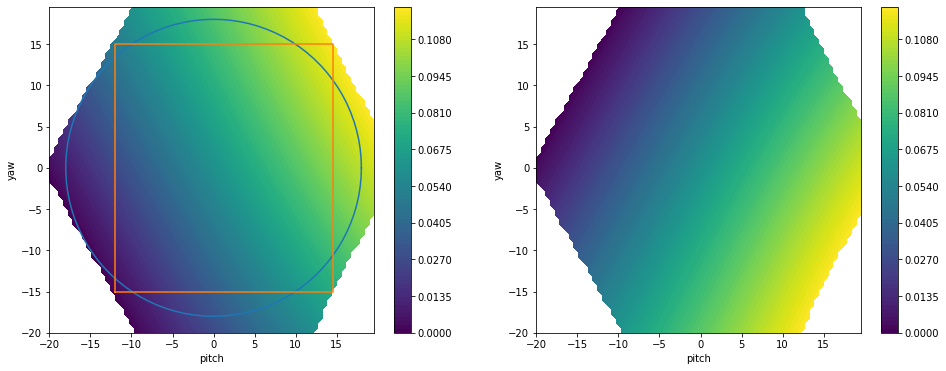

In [142]:
X,Y = np.meshgrid(YAW, PITCH)

fig, ax = plt.subplots(1,2, figsize=(16,6))
z1 = ax[0].contourf(X*(180/np.pi), Y*(180/np.pi), Z1, 100)
fig.colorbar(z1, ax=ax[0])
z2 = ax[1].contourf(X*(180/np.pi), Y*(180/np.pi), Z2, 100)
fig.colorbar(z2, ax=ax[1])
for i in range(2):
    ax[i].set_xlabel('pitch')
    ax[i].set_ylabel('yaw')

an = np.linspace(0, 2 * np.pi, 100)
r=18
ax[0].plot(r * np.cos(an), r * np.sin(an))

p_min,p_max = -12,14.5
y_min,y_max = -15, 15
ax[0].plot([p_min,p_max,p_max,p_min,p_min],[y_min,y_min,y_max,y_max,y_min])